# Visual Summaries of Data

** To do:** 
* **add more info on KDE**
* **add part about PCA and t-SNE**

Numerical summaries are great, but: humans are excellent at pattern recognition!
For exploratory data analysis, letting the brain do the work can be very useful. In this tutorial, we'll explore visual summaries of data. Many of these might be familiar to you!

## Plotting Basics

At the same time, we will also explore two plotting libraries for python: matplotlib and seaborn. 
Matplotlib is a very general, very powerful plotting library, but its interface can also often be a bit confusing. Seaborn is built on top of matplotlib: it tries to simplify commonly-used visualisation tasks into something that's easier to handle and looks better than it would be with the standard matplotlib interface alone. 

Let's import some packages we'll need. iPython has a magic function that will make the figures we'll produce below appear in the notebook itself:

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import numpy as np


Here's a simple line plot:

(-1.0, 1.0)

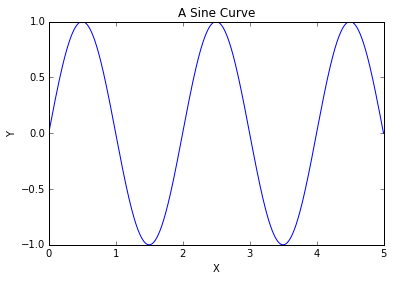

In [3]:
## make a simple sine curve
x = np.linspace(0.0, 5.0, 1000)
y = np.sin(2.*np.pi*x/2.0)

## plot x and y
plt.plot(x,y)

## set some labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("A Sine Curve")

## set the ranges of the x- and y-axes
plt.xlim(0.0, 5.0)
plt.ylim(-1.0, 1.0)

The simple line `plt.plot` makes a plot, but does a whole lot of magic in the background. We can do the same by instantiating an `Axes` object:

(-1.0, 1.0)

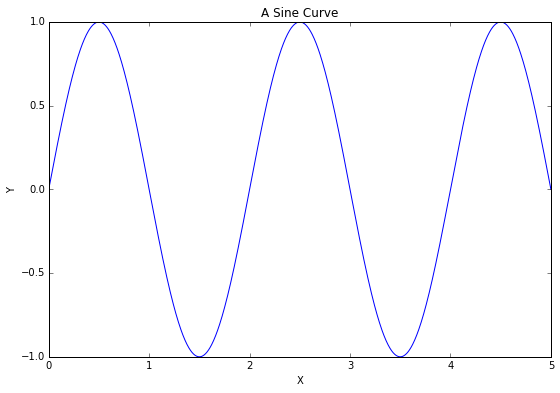

In [4]:
## make a figure
fig = plt.figure(figsize=(9,6))

## make an Axes object in the figure
ax = fig.add_subplot(111)

## now do the plot
ax.plot(x,y)

## set some labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("A Sine Curve")

## set the ranges of the x- and y-axes
ax.set_xlim(0.0, 5.0)
ax.set_ylim(-1.0, 1.0)

Notice how the second way allows us to specify more parameters (for example, the size of the figure) as well as allows us to make more than one subplot. Also, notice how the syntax for setting the labels as well as ranges of x- and y-axis have changed: they're now an attribute of the `Axes` object and have acquired a `set_` in front of each of them!

### Adding Seaborn to the mix

Seaborn has its own plotting functionality, but at the simplest level, importing seaborn will change the pre-sets for what the plot will look like:



In [5]:
import seaborn as sns

Let's see what our first plot looks like now:

(-1.0, 1.0)

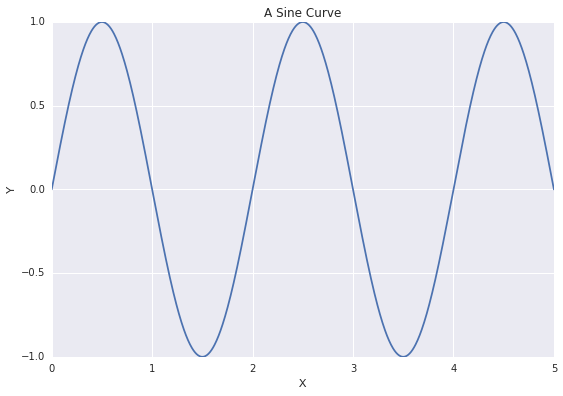

In [6]:
## make a figure
fig = plt.figure(figsize=(9,6))

## make an Axes object in the figure
ax = fig.add_subplot(111)

## now do the plot
ax.plot(x,y)

## set some labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("A Sine Curve")

## set the ranges of the x- and y-axes
ax.set_xlim(0.0, 5.0)
ax.set_ylim(-1.0, 1.0)

The figure now has a dark background, and the colour scheme has changed, too! Seaborn does a lot of cool stuff that will improve overall aesthetics of figures. 

You can control the overall look of your plot by choosing one of the five seaborn style presets: darkgrid, whitegrid, dark, white, and ticks:

In [7]:
sns.set_style("whitegrid")

Using the above command will generally change the look of all plots that follow it. If you want to temporarily change the style for a single plot, use this syntax:

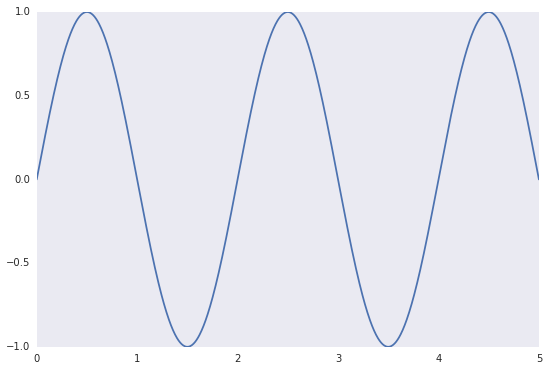

In [8]:
with sns.axes_style("dark"):
    ## make a figure
    fig = plt.figure(figsize=(9,6))
    ## make an Axes object in the figure
    ax = fig.add_subplot(111)
    ## now do the plot
    ax.plot(x,y)


**Exercise**: try out the seaborn pre-sets and pick whichever you like best!

In addition to having style presets, seaborn also allows for different presentation modes: a figure for a paper should probably look different from a figure for a presentation!
You can set these using the `set_context` command; the available options are: paper, notebook, talk, and poster.

Notice in the command below, I've also included the `font_scale` keyword. Unsurprisingly, this allows you to control the scale of the axis tick labels and axis labels.

In [9]:
sns.set_context("notebook", font_scale=1.5)

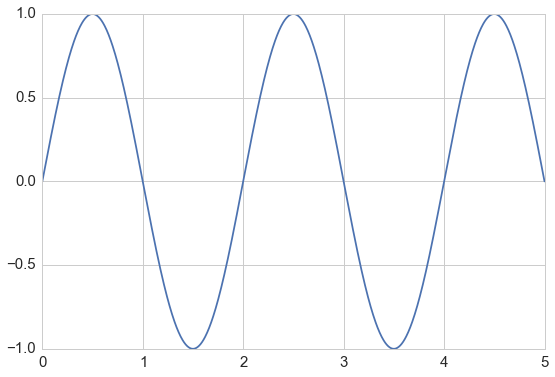

In [10]:
## make a figure
fig = plt.figure(figsize=(9,6))

## make an Axes object in the figure
ax = fig.add_subplot(111)

## now do the plot
ax.plot(x,y)


**Exercise**: Try out the different seaborn presets. What changes when you change the context?

### A Note on Colour

One of the most important (but often overlooked) decisions to make when making plots is which colour palette to choose. Using the wrong colourmap might make you miss important features in your data, because they way colour was used (and the way our brain perceives it!) may effectively hide these features.
What may have looked good on the screen might not in paper (and yes! some of us still print papers out!). What may have looked good in colour make look completely scrambled when converted to greyscale.
Some colour combinations may put some readers (for example colourblind ones) at a disadvantage. 
For a good introduction into the topic (and why you should avoid a rainbow colour palette) can be found here: http://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/ and here https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/. 

Seaborn has some great tools to play around with colourmaps. Here's the seaborn default colour palette, which your plots will automatically adopt when you import seaborn:



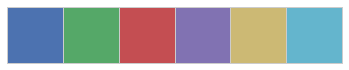

In [11]:
## get the current color palette
current_palette = sns.color_palette()

sns.palplot(current_palette)

I invite you to have a look at the relevant part of the seaborn documentation for more information on how to manipulate this colourmap or implement a different one: http://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html

I personally like the colourblind palette:

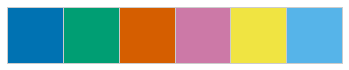

In [12]:
current_palette = sns.color_palette("colorblind")
sns.palplot(current_palette)

You can set the (standard) colour palette in seaborn with:

In [13]:
sns.set_palette("colorblind")

### Adding some astronomy data

This is the same code you encountered before, which will download some SDSS photometry data.

In [200]:
import os
import requests 

# get some CSV data from the SDSS SQL server
URL = "http://skyserver.sdss.org/dr12/en/tools/search/x_sql.aspx"

cmd = """
SELECT TOP 10000
    p.u, p.g, p.r, p.i, p.z, s.class, s.z, s.zerr
FROM
    PhotoObj AS p
JOIN
    SpecObj AS s ON s.bestobjid = p.objid
WHERE
    p.u BETWEEN 0 AND 19.6 AND
    p.g BETWEEN 0 AND 20 AND
    (s.class = 'STAR' OR s.class = 'GALAXY' OR s.class = 'QSO')
"""
if not os.path.exists('all_colors.csv'):
    cmd = ' '.join(map(lambda x: x.strip(), cmd.split('\n')))
    response = requests.get(URL, params={'cmd': cmd, 'format':'csv'})
    with open('all_colors.csv', 'w') as f:
        f.write(response.text)

In [201]:
import pandas as pd
df = pd.read_csv("all_colors.csv",skiprows=1)

In [202]:
len(np.where(df["class"]=="QSO")[0])

707

## Visualizing Univariate Data

Now that we've got the basics out of the way, let's look at some ways to visualize univariate data. How we visualize data depends to first order on whether it is **continuous** or **categorical** data. 

### Continuous Data

Let's look at some continuous data first. We'll randomly sample 100000 times from a Gaussian distribution with a mean of 3 and a standard deviation of 0.5 to produce some continuous data.

In [214]:
## Don't have a data set yet, make some dummy data
#x = np.random.normal(loc=3.0, scale=0.5, size=100000)
galaxies = df[df["class"] == "GALAXY"]

In [215]:
x = np.array(galaxies["r"])

Now how to look at that data? The most obvious visualization you might do (and you might have done in the past), is called a **histogram**: define some bins, then cound all the data points that fall within each bin, and make a bar plot:

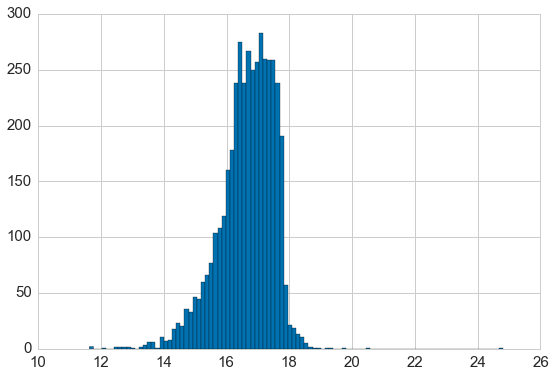

In [216]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.hist(x, bins=100, normed=False);

The keyword `bins` determines into how many bins to chop the data set, the keyword `normed` sets whether the output histogram is noramlized such that it integrates up to 1 or not. The matplotlib default is 10 for `bins`, which will be fairly low for most applications and data sets, and `False` for `normed`. If only `bins` is set, the method will take the smallest and the largest value in the data set and evenly distribute bins within those ranges. It is also possible to set the range manually:

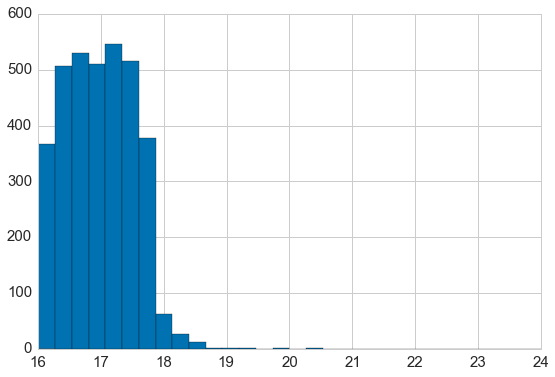

In [210]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.hist(x, bins=30, range=[16.0,24.]);

Or just set the bin edges manually:

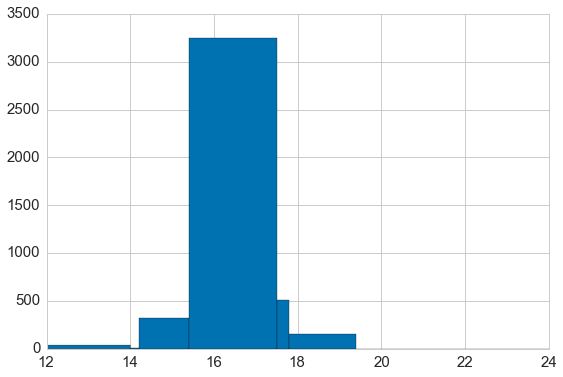

In [211]:
## set the bin edges manually
bin_edges = [12.0, 14.0, 14.2, 15.4, 17.5, 17.8, 19.4, 20.0, 24.0]

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.hist(x, bins=bin_edges);

A word of caution: what your data will look like **strongly** depends on how fine-grained you choose your binning.
If it is too coarse, you  might miss interesting features in the data. If it is too fine, noise may hide some of the overall structure you're interested in. 

Let me demonstrate:

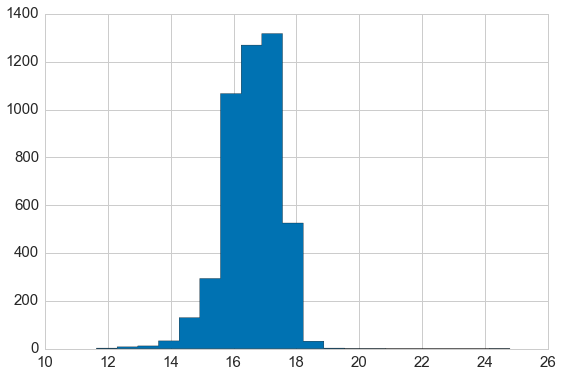

In [229]:
## new data set:
## Don't have a data set yet, make some dummy data
x2 = np.random.normal(loc=16., scale=0.1, size=400)

## add both data sets together
xnew = np.hstack([x,x2])

## plot the histogram
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.hist(xnew, bins=20, histtype="stepfilled");

Looks almost exactly like the first histogram we made, right? 

**Exercise**: Now change the number of bins and watch what happens (FYI: set `histtype="stepfilled"` to remove the annoying outlines of bins)! Try both very big and very small numbers as well as a few in between. 

There is no a-priori good answer to what the right bin size should be! If you don't know ahead of time what's in your data, it usually pays to try out a few bin sizes to get a feel for the structure. 
If that's not good enough, you can make a histogram with variable bin edges, where the width of the bin effectively depends on structure within the data. One such method is Bayesian Blocks (http://adsabs.harvard.edu/abs/2013arXiv1304.2818S). The basic implementation below comes from https://jakevdp.github.io/blog/2012/09/12/dynamic-programming-in-python/, there is a better one in the python package AstroML (http://www.astroml.org/)

In [230]:
def bayesian_blocks(t):
    """Bayesian Blocks Implementation

    By Jake Vanderplas.  License: BSD
    Based on algorithm outlined in http://adsabs.harvard.edu/abs/2012arXiv1207.5578S

    Parameters
    ----------
    t : ndarray, length N
        data to be histogrammed

    Returns
    -------
    bins : ndarray
        array containing the (N+1) bin edges

    Notes
    -----
    This is an incomplete implementation: it may fail for some
    datasets.  Alternate fitness functions and prior forms can
    be found in the paper listed above.
    """
    # copy and sort the array
    t = np.sort(t)
    N = t.size

    # create length-(N + 1) array of cell edges
    edges = np.concatenate([t[:1],
                            0.5 * (t[1:] + t[:-1]),
                            t[-1:]])
    block_length = t[-1] - edges

    # arrays needed for the iteration
    nn_vec = np.ones(N)
    best = np.zeros(N, dtype=float)
    last = np.zeros(N, dtype=int)

    #-----------------------------------------------------------------
    # Start with first data cell; add one cell at each iteration
    #-----------------------------------------------------------------
    for K in range(N):
        # Compute the width and count of the final bin for all possible
        # locations of the K^th changepoint
        width = block_length[:K + 1] - block_length[K + 1]
        count_vec = np.cumsum(nn_vec[:K + 1][::-1])[::-1]

        # evaluate fitness function for these possibilities
        fit_vec = count_vec * (np.log(count_vec) - np.log(width))
        fit_vec -= 4  # 4 comes from the prior on the number of changepoints
        fit_vec[1:] += best[:K]

        # find the max of the fitness: this is the K^th changepoint
        i_max = np.argmax(fit_vec)
        last[K] = i_max
        best[K] = fit_vec[i_max]

    #-----------------------------------------------------------------
    # Recover changepoints by iteratively peeling off the last block
    #-----------------------------------------------------------------
    change_points =  np.zeros(N, dtype=int)
    i_cp = N
    ind = N
    while True:
        i_cp -= 1
        change_points[i_cp] = ind
        if ind == 0:
            break
        ind = last[ind - 1]
    change_points = change_points[i_cp:]

    return edges[change_points]

Let's use this algorithm on the data set above:

In [231]:
edges = bayesian_blocks(xnew)

This just gives us the bin edges, but we can use these with the standard histogram function to make the plot:

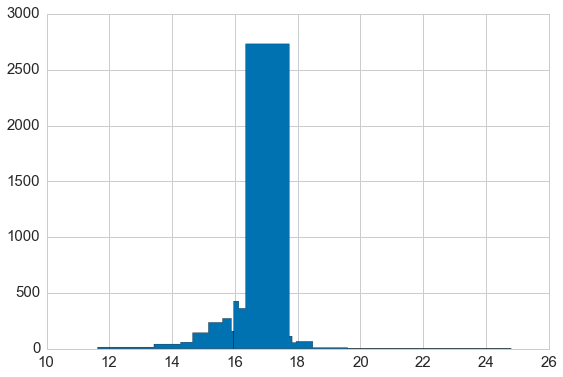

In [232]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.hist(xnew, bins=edges, histtype="stepfilled");

Another way to represent univariate data are **rug plots**. Matplotlib doesn't have a direct way to do one, but you can fudge it with using `vlines`:

(0, 1)

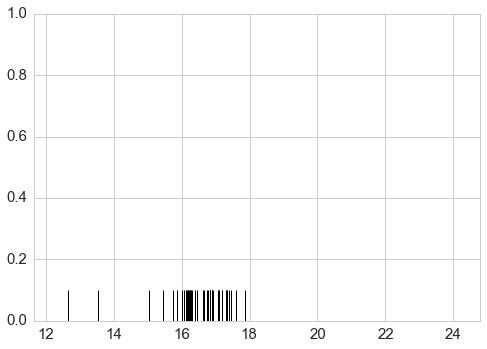

In [234]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.vlines(x[::100], 0.0, 0.1, lw=1, color="black")
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(0, 1)

Seaborn does have a command to make rug plots:

(0, 1)

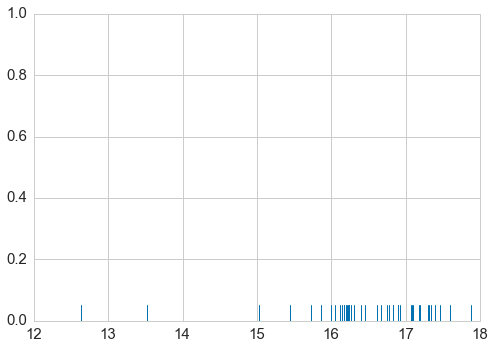

In [235]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.rugplot(x[::100].T, height=0.05, axis='x', ax=ax, color=current_palette[0])
ax.set_ylim(0,1)

More interestingly, and in many cases more useful than a histogram is a **kernel density estimation (KDE)**. 
KDE is a non-parametric way to estimate the density of a distribution, based on a random sample (the data) and a kernel function.

Given some data $\bf{x} = \{x_1, x_2, ..., x_n\}$, the kernel density estimate of the function in question is

$\mathrm{KDE}(x) = \frac{1}{nh} \sum_{i=1}^N{K(\frac{x - x_i}{h})}$.

There are many different kernel functions that can be used, but for its properties, using a standard Gaussian is common. The kernel has a smoothing parameter $h$ works analogously to the number of bins in the histograms above and that determines how smooth the resulting function will be: both underfitting and overfitting can be a problem here! There exist a few rules of thumb to estimate the smoothness (which I should add here!). 

In python, `scipy.stats` includes a function that allows for kernel density estimation using a Gaussian. The keyword `bw_method` gives the rule for estimating the smoothing. This can be a rule of thumb (`"scott"` or `"silverman"`), a scalar or a self-supplied function. For comparison, we also plot the distribution used in generating the data:

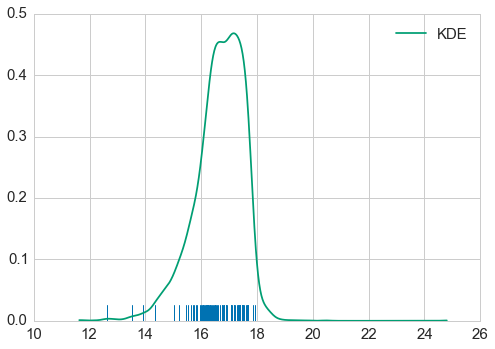

In [239]:
import scipy.stats

## do the kernel density estimation on the data
kde = scipy.stats.gaussian_kde(x, bw_method="scott")

## x-coordinate for the kernel density estimate
x_kde = np.linspace(np.min(x), np.max(x), 1000)

## the KDE at positions x_kde
y_kde = kde(x_kde)

fig = plt.figure()
ax = fig.add_subplot(111)
## plot a smaller sample of the data as a rugplot
sns.rugplot(x[::50].T, height=0.05, axis='x', ax=ax, color=current_palette[0])

## plot the kernel density estimate
ax.plot(x_kde, y_kde, color=current_palette[1], label="KDE")

plt.legend() ## add a legend


**Exercise**: Play around with the number of data points included in the KDE, as well as the bandwith used (play with a scalar bandwidth). How many data points do you need to estimate the probability density function that we used to create the data? How well do the two different estimation rules for the smoothing parameter do?

In seaborn, you can use the function `kdeplot` to plot a kernel density estimate, which will be slightly prettier (and shorter!) than what we achieved in pure scipy + matplotlib above:

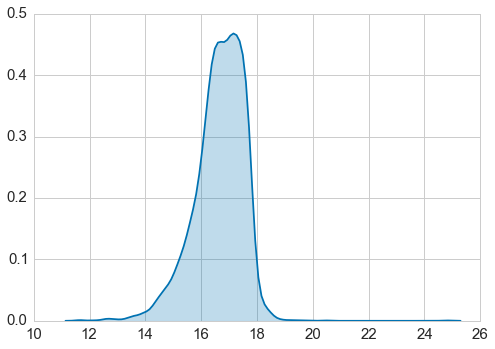

In [240]:
sns.kdeplot(x, bw="scott", shade=True)

Seaborn also has some code that combines all three: rug plots, kernel density estimates and histograms. By default, it will make a histogram and a kernel density estimate, but the boolean keywords `hist`, `kde` and `rug` turn the respective components on and off.

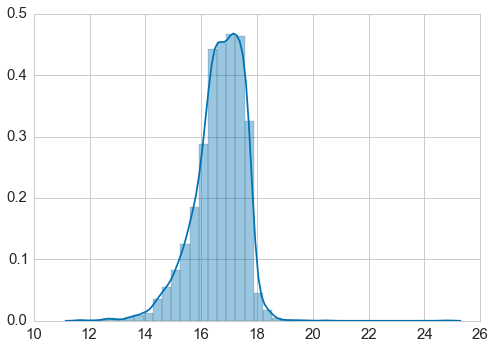

In [241]:
sns.distplot(x, bins=40, hist=True, kde=True, rug=False);

Remember how we fit parametric distributions to samples of data back in the first part of the tutorial? That's right, seaborn can do that, too, for any of the distributions given in scipy.stats!

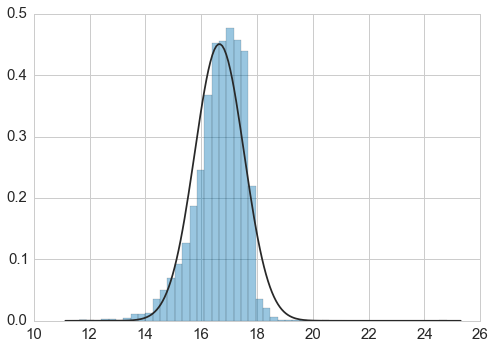

In [242]:
sns.distplot(x, kde=False, fit=scipy.stats.norm);

### Categorical or Discrete Data

Unlike continuous data, categorical data doesn't follow (necessarily) a statistical distribution. So how can we visualize categorical data? 

Well, the obvious analogy to the histogram is a bar plot (but now we cannot choose the number of bins: they will be set by the number of categories we have!).

Let's make some categorical data and then show a bar plot. We will sample from a Poisson distribution, which is a discrete statistical distribution (that is, one can only sample at integer intervals). Note that if our categorical data has errors, then you can use `yerr` to include these in the bar plot.

In [243]:
x = np.random.poisson(10, size=10000)

## count all occurrences of integers in x
y = np.bincount(x)

<Container object of 23 artists>

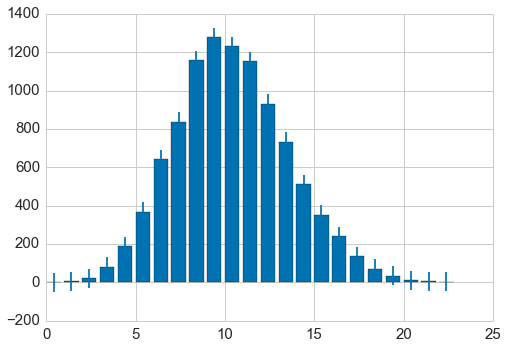

In [244]:
## make some categorical data:
x = np.random.poisson(10000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(y.shape[0]), y, yerr=50.0)

In [247]:
n_galaxies = len(df[df["class"] == "GALAXY"])
n_stars = len(df[df["class"] == "STAR"])
n_qsos = len(df[df["class"] == "QSO"])

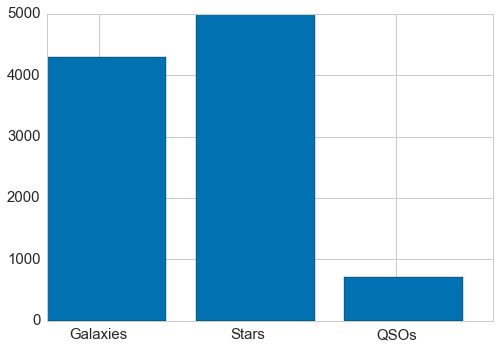

In [254]:
fig = plt.figure()
ax = fig.add_subplot(111)

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the bars
# add some text for labels, title and axes ticks
ax.bar([0,1,2], [n_galaxies, n_stars, n_qsos])
ax.set_xticks(ind+width)
ax.set_xticklabels( ("Galaxies", "Stars", "QSOs") )

## Wait, but my data is multi-dimensional!

There's only so much one can do with univariate data. Most of the data you will encounter is multi-variate anyway, so let's look at some ways we can visualize those. 
Note that while bivariate data is relative straightforward, visualizing multi-variate data can be a whole lot harder (your screen is flat, after all!). 

### Continuous data

As before, let's look at some methods to visualize continuous data first.
The simplest visualization (and often used) for bivariate data is a scatter plot:

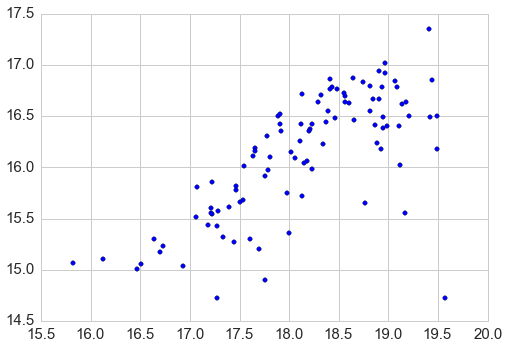

In [265]:
## bivariate data
#x = np.random.multivariate_normal(mean=[1.0, 2.0], cov=[[0.5, -1.0], [0.2, 0.1]], size=1000)
x = np.vstack([df["u"], df["i"]]).T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x[:100,0], x[:100,1])

The problem with a scatter plot is that for many data points, it may not be all that informative. 
Let me demonstrate:

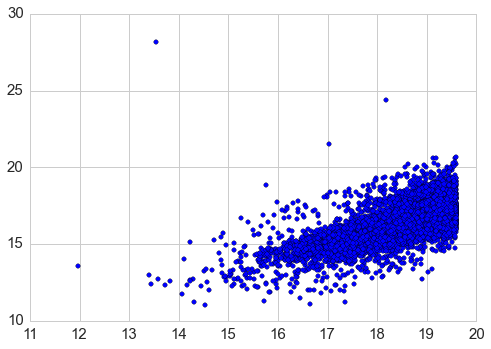

In [266]:

## same thing, just with more data points!
#x = np.random.multivariate_normal(mean=[1.0, 2.0], cov=[[0.5, -1.0], [0.2, 0.1]], size=100000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x[:,0], x[:,1])


Our figure is now one big blob of data points. We can still see the correlations between the two components, but not really the slope of the distribution. 

In this case, a 2D histogram may be the better option:

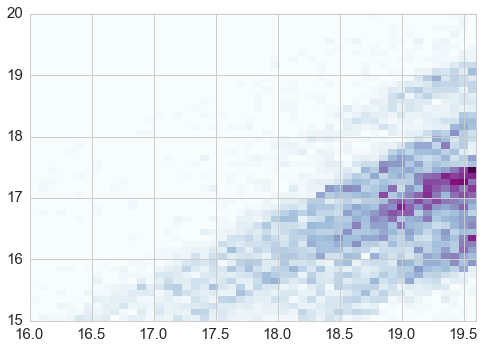

In [279]:
import matplotlib.cm as cm

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist2d(x[:,0], x[:,1], bins = 50, cmap=cm.BuPu, range=[[16.,19.6], [15,20]]);


Looks better! The same keywords that apply to `hist` also apply to `hist2d`. 
If square bins are not your  kind of thing, you may want to use `hexbin` instead (which I personally find more appealing). Notice that `hexbin` exchanges the keyword `range` with `extent`.

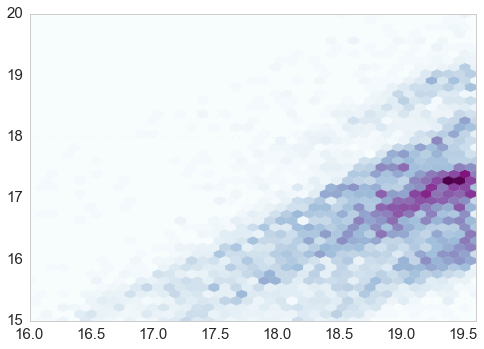

In [278]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hexbin(x[:,0], x[:,1],gridsize=40, cmap=cm.BuPu, extent=[16.,19.6, 15,20]);

Wouldn't it be nice if we could also plot some histograms displaying the two individual distributions? In seaborn, you can do just that (you can also do it in matplotlib directly, but it's a lot messier. Trust me, I've tried). The keyword `kind` sets the kind of plot you'd like to see, one of  `{“scatter” | “reg” | “resid” | “kde” | “hex” }`. If you have keywords you'd like to pass on to the matplotlib-functions that create the individual joint plot (in the middle) and marginal plots (on the sides), you can put them into a dictionary in the variables `joint_kws` and `marginal_kws` like I've done below:

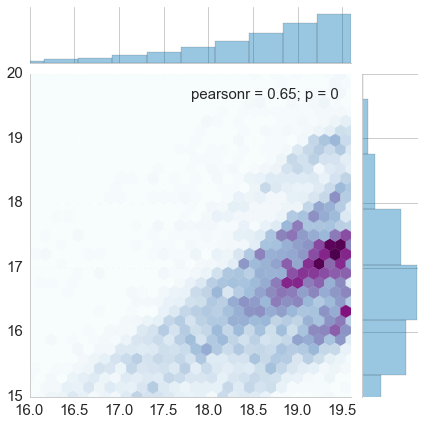

In [283]:
sns.jointplot(x=x[:,0], y=x[:,1], 
              kind="hex", xlim=[16.,19.6], ylim=[15,20],
              joint_kws={"gridsize":30, "cmap":cm.BuPu,
                        "extent":[16.,19.6, 15,20]}, 
              marginal_kws={"bins":20, "hist":{"range":[16.,19.6, 15,20]}});

Density estimation like we've done above works in 2D, too. 
In matplotlib, it's slightly more involved due to the way we need to lay out the 2D grid:

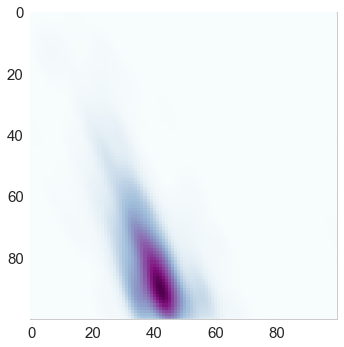

In [284]:
X1, X2 = np.mgrid[np.min(x[::10,0]):np.max(x[::10,0]):100j, np.min(x[::10,1]):np.max(x[::10,1]):100j]
pos = np.vstack([X1.ravel(), X2.ravel()])
kde = scipy.stats.gaussian_kde(x[::10].T)
Xnew = np.reshape(kde(pos).T, X1.shape)
plt.imshow(Xnew, interpolation="none", cmap=cm.BuPu, zorder=10)

In seaborn, do the same, but either in kdeplot as for the 1D example, or in jointplot as above:

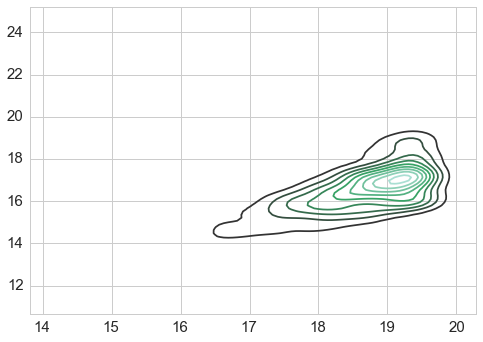

In [285]:
sns.kdeplot(x[::10,0], x[::10,1],shade=False)

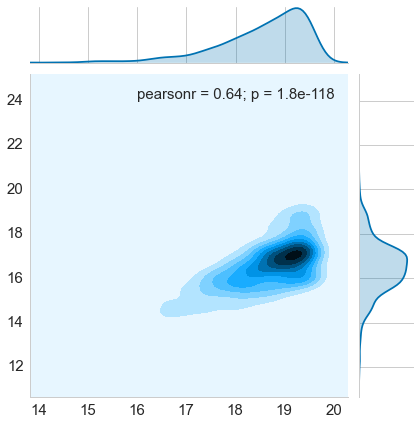

In [286]:
sns.jointplot(x=x[::10,0], y=x[::10,1], kind="kde");

What if we have even more dimensions? Well, then you quickly run into trouble, because our screens happen to be two-dimensional. Visualizations that include 3D projections are possible, but then, many data sets have even more dimensions. 

Fear not, there are a few things you can do. Let's start with categorical data for a change. Bar plots are useful if all you have is a number of instances per category. But what if for each category, you've measured a quantity? Take, for example, our SDSS data set: for each of the galaxies, stars and quasars, we've measured some magnitudes. Each variable now has a distribution attached to it. Of course, we could make a bar plot of, say, the means, but that would loose a lot of potentially valuable information. 

Here's where seaborn comes in really handy, because it offers some advanced plotting that would be much harder to achieve in matplotlib. One such example is the box plot.

At this point, it's also worth mentioning that seaborn has great integration with pandas, which is useful for these advanced plots:

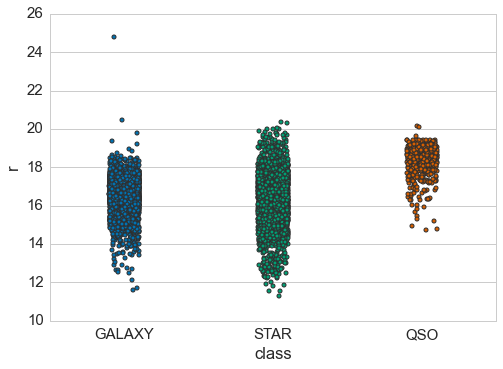

In [292]:
sns.stripplot(x="class", y="r", data=df,
                    size=4, jitter=True, edgecolor="gray")

But much like the 2D scatter plot, for many data points, this has the problem that things become hard to see!
Let's make a box plot instead, which is tidier and allows for reading off some summary statistics at a quick glance:

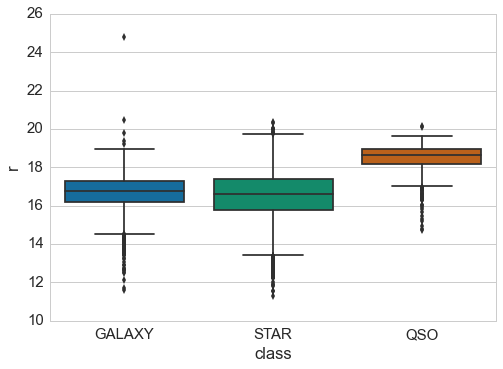

In [293]:
sns.boxplot(x="class", y="r", data=df, orient="v")


The boxes denote the interquartile range (remember that one?), the black line in the middle the median. The whiskers extend past the IQR by a factor of 1.5, which you can change with the `whis` keyword. Any data points that lie beyond are shown as scatter points to show outliers. Did you notice how the distribution for the hamsters has outliers only on one side? That's because the sample is drawn from a log-normal distribution, which isn't symmetric (unlike the other two, which are combinations of Gaussians). 

The box plot is basically the visual equivalent of Tukey's five-number summary. Even so, it only shows very coarse summaries of the data which are great for some comparisons, but not for others. 
For even more information in your figures, try a violin plot, which will show instead a kernel density estimate of the distribution that you sampled from:

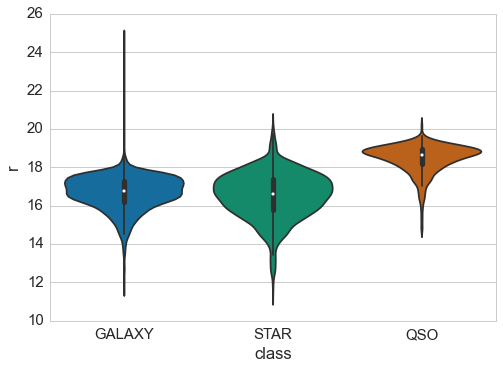

In [297]:
sns.violinplot(x="class", y="r", data=df, scale="width");

We can add another (categorical) variable to this plot using the `hue` parameter, but our data set doesn't have one, so let's invent it:

In [301]:
df["aliens"] = np.random.choice(["green", "blue"], size=len(df))

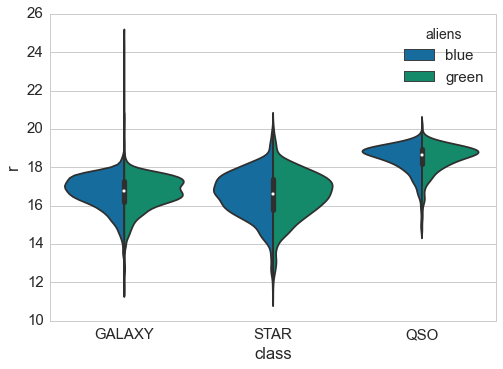

In [303]:
sns.violinplot(x="class", y="r", hue="aliens", split=True, data=df, scale="count");

This plot also shows you the median and IQR as the box plot above, but additionally, you can now get an idea what the distribution looks like. The `scale` keyword determines whether the the violins will be scaled to have the same `area`, scaled to the number of `counts` in each sample, or all have the same `width`.

If you have even more complicated data sets, seaborn allows for some superior integration using `FacetGrid`. This allows easy plotting of a large number of categorical variables (you can specify a `row` keyword, too) in a uniform way for an overview over a complicated data set.

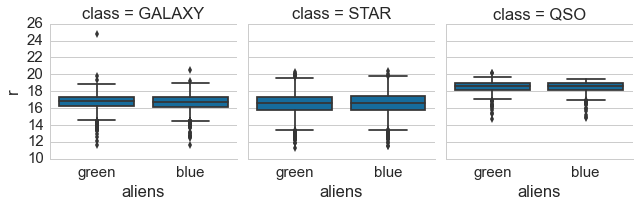

In [305]:
g = sns.FacetGrid(df, col="class")
g = (g.map(sns.boxplot, "aliens", "r")
      .set_axis_labels("aliens", "r"))

But what if you have a high-dimensional space of continuous variables?
Well, there are a few ways to deal with that: for example, you can pairwise-plot the individual dimensions against each other in a series of scatter plots. Again, this is possible to do with some fiddling in matplotlib, but seaborn has an easy function for it:

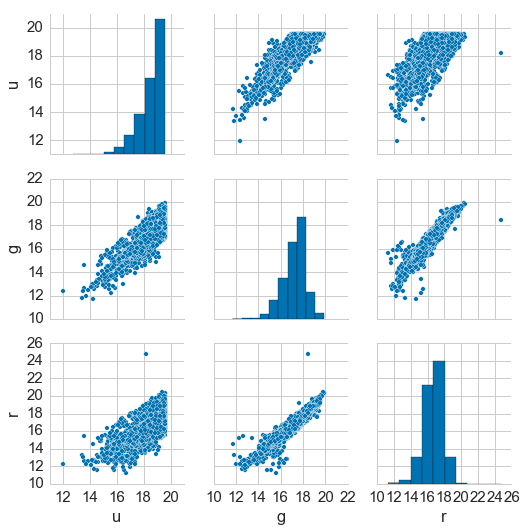

In [311]:
sns.pairplot(df[["u","g", "r"]], kind="scatter")

Or, slightly more complicated, including KDEs:

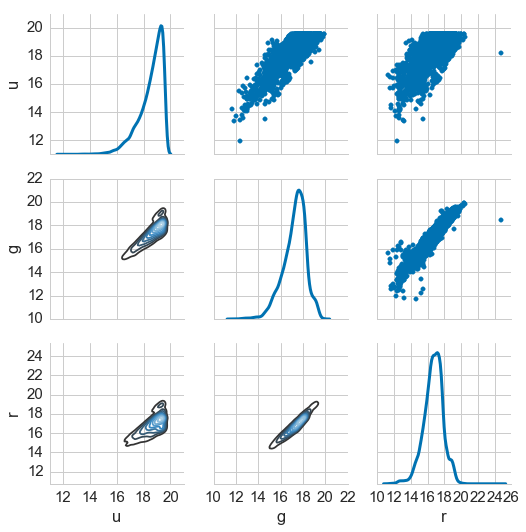

In [312]:
g = sns.PairGrid(df[["u", "g", "r"]], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Another way to visualize high-dimensional space is a parallel coordinates plot. In this plot, one draws parallel axes (as many as dimensions) and then scatters all the observations onto these axes, connected by lines.
It's an attempt to unravel a high-dimensional vector into 2D.

[**ADD THIS**]

Finally, as a short heads up for Wednesday (probably), if you have high-dimensional data, you can visualize it by projecting it into a low-dimensional space via some dimensionality reduction. There are many different techniques out there for that sort of thing, and many rely on some method to calculate distances between data points in high dimensions, and then projecting the data into lower dimensions such that the distances are conserved (or if they are not conserved, are changed in some meaningful way).

[**Add PCA and t-SNE here**]